# `Distribuição de Frequência`

<br>

### Como já vimos, na Inferência Estatística, partimos do particular para o geral. Na prática, vamos usar nossa amostra para fazer estimativas que servirão para compreender a nossa população.
<br>

![alt_text](http://sutel.com.br/curso_r/pop_amostra.PNG)

<br>

### Para que possamos fazer boas estimativas sobre nossos dados, primeiro precisamos entender como eles se comportam. Nesse sentido, a Estatística Descritiva tem um papel essencial. Lembra quando falamos sobre formas de visualizar os dados? Vamos olhar novamente para o `distplot`

#### Importando o plotly

In [22]:
import plotly.figure_factory as ff

### Vamos usar dados abertos de filmes da Netflix novamente.

<br>

https://www.kaggle.com/datasets/ariyoomotade/netflix-data-cleaning-analysis-and-visualization

### Importando a biblioteca pandas (https://pandas.pydata.org)

In [23]:
import pandas as pd

In [32]:
df = pd.read_csv('netflix.csv')

In [33]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [34]:
filmes = df[df['type'] == 'Movie']

In [35]:
filmes.count()

show_id         6126
type            6126
title           6126
director        6126
country         6126
date_added      6126
release_year    6126
rating          6126
duration        6126
listed_in       6126
dtype: int64

In [36]:
def duracao_numerica(valor):
  return int(valor.split(' ')[0])

filmes['duracao_min'] = filmes['duration'].apply(duracao_numerica)

In [37]:
filmes.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,duracao_min
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries,90
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies",91
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",125
6,s10,Movie,The Starling,Theodore Melfi,United States,9/24/2021,2021,PG-13,104 min,"Comedies, Dramas",104
7,s939,Movie,Motu Patlu in the Game of Zones,Suhas Kadav,India,5/1/2021,2019,TV-Y7,87 min,"Children & Family Movies, Comedies, Music & Mu...",87


In [44]:
fig = ff.create_distplot([filmes['duracao_min']], ['Duração dos filmes'],
                        show_hist=False, show_rug=False)

fig.update_layout(title_text = 'Duração dos Filmes')

fig.show()

### No gráfico acima, podemos ver como os dados estão distribuídos em relação às suas frequências. Como já vimos, a curva simula como seria a frequência dos dados para a população. Também podemos entender como a distribuição de probabilidade de nossa métrica.

<br>

### A parte mais legal disso é que existem muitas e muitas distribuições de probabilidade (ou frequência) já conhecidas, ou seja, já sabemos como as curvas vão se desenhar e até mesmo conseguimos escrever as fórmulas matemáticas que dão origem a essas curvas. Isso acaba facilitando o processo de inferência, pois fica mais fácil de entender como os dados vão se comportar.

<br>

### Em geral, podemos dividir essas distribuições em dois tipos: `contínuas e discretas`. As distribuições **discretas são aquelas onde os dados são contáveis e enumeráveis** como, por exemplo, a quantidade de pessoas numa fila, ou a quantidade de horas inteiras que se passaram num período. Já as distribuições **contínuas são aquelas onde os dados não conseguimos contar, e somente conseguimos entendê-los em intervalo**. Um exemplo é a altura de pessoas ou o tempo, pois sempre haverá alguma casa decimal  a mais para especificar o momento ou a medida exata.

<br>

### `Vamos ver algumas distribuições conhecidas!`

# `Bernoulli`

<br>

Essa é uma distribuicão para dados discretos, quando os dados assumem valor 1 ou 0. Por exemplo, se estamos tentando entender se vai ou não chover em um dia, ou se uma pessoa vai ou não assinar um serviço de streaming


![alt_text](https://www.statology.org/wp-content/uploads/2021/01/bernoulli1.png)

<br>

### A distribuição de probabilidade de uma Bernoulli fica assim:

<br>

![alt_text](https://d138zd1ktt9iqe.cloudfront.net/media/seo_landing_files/bernoulli-distribution-graph-1634631289.png)

### Mostrando a distribuição de probabilidade de Bernoulli:

In [3]:
import numpy as np
from scipy.stats import bernoulli

In [4]:
bernoulli.rvs(p=0.2, size=10) ### .rvs cria varieaveis aleatórias

array([0, 1, 0, 1, 0, 0, 1, 1, 0, 1])

In [5]:
bernoulli.rvs(p=0.2, size=10)

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [6]:
bernoulli.rvs(p=0.5, size=10)

array([1, 1, 0, 1, 1, 1, 0, 0, 0, 1])

*Random State*

In [7]:
bernoulli.rvs(p = 0.2, size = 10, random_state = 100) ### o random_state, gera sempre o mesmo valor

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0])

In [8]:
bernoulli.rvs(p = 0.2, size = 10, random_state = 99)

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 0])

### Como fica o histograma de uma amostra Bernoulli?

In [9]:
import plotly.express as px

In [10]:
fig = px.histogram(bernoulli.rvs(p = 0.3, size = 500000))

fig.update_layout(title_text='Histograma de uma Bernoulli com p = 0.30')

fig.show()

Aqui, é interessante que a variância de uma Bernoulli com probabilidade de sucesso p é igual a p*(1-p)

## Cenário Real: Previsão de Abandono de Carrinho de Compras

**Contexto:** Você trabalha como Cientista de Dados em um e-commerce e precisa analisar a taxa de abandono de carrinho de compras. O objetivo é identificar a probabilidade de um usuário que adiciona um produto ao carrinho realizar a compra ou não.

**Modelagem com Bernoulli:** Podemos modelar esse problema utilizando a distribuição de Bernoulli, já que cada usuário tem duas possibilidades:

* **Sucesso:** Comprar o produto (1)
* **Fracasso:** Abandonar o carrinho (0)

**Código em Python:**

```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Criando um DataFrame exemplo
dados = {'usuario': range(1, 101),
         'comprou': np.random.randint(0, 2, 100)}

df = pd.DataFrame(dados)

# Calculando a probabilidade de sucesso (compra)
probabilidade_compra = df['comprou'].mean()

print(f"Probabilidade de Compra: {probabilidade_compra:.2f}")

# Plotando o gráfico da distribuição de Bernoulli
plt.figure(figsize=(8, 5))
sns.countplot(x='comprou', data=df)
plt.title('Distribuição de Bernoulli para Abandono de Carrinho')
plt.xlabel('Compra (1) ou Abandono (0)')
plt.ylabel('Número de Usuários')
plt.show()
```

**Explicação do Código:**

1. **Importando Bibliotecas:** Importamos as bibliotecas necessárias:
    * `pandas` para manipulação de dados.
    * `numpy` para geração de números aleatórios.
    * `matplotlib` e `seaborn` para visualização de dados.

2. **Criando o DataFrame:** Criamos um DataFrame `df` representando 100 usuários. A coluna `comprou` indica se o usuário realizou a compra (1) ou abandonou o carrinho (0). Os valores são gerados aleatoriamente para simular o cenário.

3. **Calculando a Probabilidade de Sucesso:**
    * Utilizamos a função `mean()` na coluna `comprou` para calcular a proporção de usuários que realizaram a compra.
    * Essa proporção representa a probabilidade de sucesso na distribuição de Bernoulli.

4. **Plotando o Gráfico:**
    * Utilizamos `sns.countplot()` para visualizar a distribuição dos usuários que compraram ou abandonaram o carrinho.
    * O gráfico mostra a frequência de cada resultado (0 ou 1), ilustrando a distribuição de Bernoulli.

**Importância da Distribuição de Bernoulli:**

* **Modelo Simples e Eficaz:** Permite modelar cenários com dois resultados possíveis, simplificando a análise de eventos binários.
* **Base para Outros Modelos:** Serve como base para outras distribuições e modelos estatísticos mais complexos, como a Distribuição Binomial e Regressão Logística.
* **Aplicações Práticas:** É utilizada em diversas áreas, como análise de risco de crédito, detecção de fraude, marketing digital e pesquisa médica, para análise de dados binários.

**Análise do Resultado:**

O gráfico e a probabilidade calculada fornecem insights sobre o comportamento do usuário. No exemplo, se a probabilidade de compra for baixa, você pode investigar as causas de abandono de carrinho e implementar estratégias para aumentar a conversão, como oferecer frete grátis ou descontos.

Lembre-se que este é um exemplo básico e, em um cenário real, você teria dados mais complexos e precisaria realizar análises mais aprofundadas.


### **Usando o código:**

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
# Criando um DataFrame exemplo
dados = {'usuario': range(1, 101),
         'comprou': np.random.randint(0, 2, 100)}

df = pd.DataFrame(dados)

In [74]:
# Calculando a probabilidade de sucesso (compra)
probabilidade_compra = df['comprou'].mean()

print(f"Probabilidade de Compra: {probabilidade_compra:.2f}")

Probabilidade de Compra: 0.54


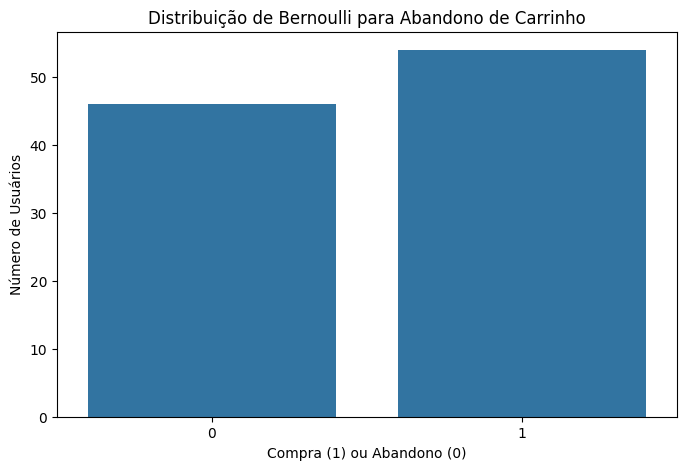

In [92]:
# Plotando o gráfico da distribuição de Bernoulli
plt.figure(figsize=(8, 5))
sns.countplot(x='comprou', data=df)
plt.title('Distribuição de Bernoulli para Abandono de Carrinho')
plt.xlabel('Compra (1) ou Abandono (0)')
plt.ylabel('Número de Usuários')

plt.show()


In [80]:
import plotly.express as px
import plotly.figure_factory as ff

In [101]:
# Criando o gráfico com Plotl

fig = px.histogram(df, x='comprou',
                   title='Distribuição de Bernoulli para Abandono de Carrinho',
                   labels={'comprou': 'Ação do Usuário'},
                   color_discrete_sequence=['#636EFA']) # Definindo uma cor padrão

###--- Configurando rótulos das barras com valores
# Obtém as contagens para os valores 0 e 1 na ordem correta
contagens = df['comprou'].value_counts().reindex([0, 1]).values

# Configurando rótulos das barras com valores
fig.update_traces(text=contagens, textposition='outside')

### ---

# Personalizando o layout
fig.update_layout(xaxis=dict(tickmode='array',
                              tickvals=[0, 1],
                              ticktext=['Abandono (0)', 'Compra (1)']),
                   yaxis_title='Número de Usuários',
                   showlegend=False)

# Adicionando anotação com a probabilidade de compra
fig.add_annotation(text=f"Probabilidade de Compra: {probabilidade_compra:.2f}",
                    xref="paper", yref="paper",
                    x=0.8, y=0.9, showarrow=False, font_size=14)

fig.show()


# `Binomial`

<br>

### Essa é uma distribuicão para `dados discretos`, quando os dados que temos se resume ao número de sucessos numa sequência de n tentativas, onde cada tentativa tem somente dois resultados possíveis: `sucesso e fracasso`. Por exemplo, a quantidade de caras em um 10 lançamentos de uma moeda, ou o número de usuários que vão cancelar um serviços de streaming dentro de toda a base de assinantes.

<br>
<br>

![alt_text](https://www.onlinemathlearning.com/image-files/binomial-distribution-formula.png)

<br>
<br>

#### A distribuição de probabilidade de uma Binomial fica assim:

<br>
<br>

![alt_text](https://bookdown.org/matheusogonzaga/apostila_r2/Apostila_R_files/figure-html/unnamed-chunk-4-1.png)

### Podemos amostrar de uma distribuição de probabilidade Binomial

In [11]:
from numpy.random import binomial

In [14]:
binomial(n = 10, p = 0.7, size = 5) ### n = número de tentativas, p = probabilidade de sucesso, size = número de amostras

array([7, 6, 8, 6, 8])

In [15]:
binomial(n = 10, p = 0.7, size = 5)

array([ 8,  8, 10,  9,  7])

In [16]:
binomial(n = 10, p = 0.5, size = 5)

array([5, 5, 7, 5, 6])

Aqui, é interessante que o valor esperado de sucessos vai ser sempre n*p, ou seja, a quantidade de repetições vezes a probabilidade de sucesso

### Como fica o histograma de uma amostra Binomial?

In [22]:
fig = px.histogram(binomial(n = 20, p = 0.7, size = 500000))

fig.update_layout(title_text='Histograma de uma Binomial com n = 20 e p = 0.70')

fig.show()

## Cenário Real: Conversão de Campanhas de Marketing Digital (Corrigido)

<br>

**Contexto:** Você trabalha como Cientista de Dados em uma empresa de marketing digital e precisa analisar a efetividade de uma campanha publicitária online. O objetivo é entender a probabilidade de um usuário clicar em um anúncio da campanha após visualizá-lo.

<br>

**Modelagem com Binomial:**  A distribuição Binomial é perfeita para este cenário, pois modela a quantidade de sucessos (cliques) em um número fixo de ensaios (visualizações), onde a probabilidade de sucesso (CTR) é constante.

<br>

**Exemplo:**

Imagine que sua campanha teve 1000 visualizações e a taxa de cliques (CTR) histórica é de 3%. Queremos visualizar a distribuição de probabilidade para o número de cliques usando um gráfico de barras com rótulos.

**Código em Python (Corrigido):**

```python
import numpy as np
import plotly.express as px
import plotly.figure_factory as ff

# Parâmetros da Binomial
n = 1000  # Número de visualizações (ensaios)
p = 0.03  # Probabilidade de clique (sucesso)

# 1. Gerando dados da distribuição
x_data = np.arange(0, n + 1)  # Possíveis valores de cliques (0 a 1000)
y_data = np.random.binomial(n, p, size=10000)  # Simulando 10.000 cenários
hist_data = np.histogram(y_data, bins=x_data)  # Calculando a frequência de cada valor

# 2. Criando o gráfico com plotly.express
fig = px.bar(
    x=hist_data[1][:-1],  # Ajustando bins para o gráfico de barras
    y=hist_data[0],
    labels={'x':'Número de Cliques', 'y':'Frequência'}
)

# 3. Adicionando rótulos às barras
for i, val in enumerate(hist_data[0]):
    if val != 0:  # Ignorando barras com frequência zero
        fig.add_annotation(
            x=hist_data[1][i],
            y=val,
            text=f'{val:.0f}',
            showarrow=False,
            yshift=10,
            font=dict(size=8)
        )

fig.update_layout(
    title_text='Distribuição Binomial para Cliques em Anúncios',
    xaxis_title='Número de Cliques',
    yaxis_title='Frequência',
)

fig.show()
```

**Explicação Detalhada do Código:**

1. **Gerando dados da distribuição:**
   - `x_data`: Cria um array com todos os possíveis valores de cliques, de 0 a 1000.
   - `y_data`: Simula 10.000 cenários da campanha, gerando números aleatórios que seguem a distribuição Binomial (n=1000, p=0.03).
   - `hist_data`: Calcula a frequência (quantas vezes cada valor aparece) dos resultados da simulação, criando um histograma.

2. **Criando o gráfico com `plotly.express`:**
   - `px.bar`: Cria um gráfico de barras utilizando:
     - `x`: Os valores dos bins do histograma (número de cliques), ajustados para o gráfico.
     - `y`: As frequências correspondentes a cada bin (quantos cenários resultaram naquele número de cliques).
     - `labels`: Define os nomes dos eixos x e y.

3. **Adicionando rótulos às barras:**
   - Iteramos sobre cada barra do histograma.
   - `if val != 0:`: Verifica se a frequência da barra é diferente de zero para evitar adicionar rótulos desnecessários.
   - `fig.add_annotation`: Adiciona o rótulo com a frequência da barra, formatado como um número inteiro, acima da barra correspondente.

<br>

**Analisando os Resultados:**

O gráfico da distribuição Binomial permite visualizar a probabilidade de diferentes quantidades de cliques. A partir dele, você pode:

* **Definir Metas Realistas:** Ter uma expectativa mais precisa sobre o desempenho da campanha.
* **Identificar Desvios:** Se o número de cliques reais estiver muito fora da faixa de probabilidade esperada, pode indicar problemas na campanha ou mudanças no comportamento do usuário.
* **Comparar Diferentes Estratégias:** Simular o impacto de diferentes taxas de clique (p) no resultado da campanha e escolher a estratégia com maior probabilidade de sucesso.

<br>

**Importância da Distribuição Binomial:**

* **Marketing Digital:** Avaliar o desempenho de campanhas, definir metas realistas, identificar desvios e comparar diferentes estratégias de marketing.
* **Engenharia de Software:** Analisar resultados de testes A/B, modelar a probabilidade de erros em um software, etc.
* **Controle de Qualidade:** Modelar a probabilidade de encontrar produtos defeituosos em uma amostra.
* **Saúde:** Analisar a efetividade de tratamentos médicos em grupos de pacientes.

### Usando o código:

In [26]:
import numpy as np
import plotly.express as px
import plotly.figure_factory as ff

# Parâmetros da Binomial
n = 1000  # Número de visualizações (ensaios)
p = 0.03  # Probabilidade de clique (sucesso)

# Gerando dados da distribuição
x_data = np.arange(0, n + 1)
y_data = np.random.binomial(n, p, size=10000)
hist_data = np.histogram(y_data, bins=x_data)

# Criando o gráfico com plotly.express
fig = px.bar(
    x=hist_data[1][:-1],  # Ajustando os bins para o gráfico de barras
    y=hist_data[0],
    labels={'x':'Número de Cliques', 'y':'Frequência'}
)

#  Adicionando rótulos às barras
for i, val in enumerate(hist_data[0]):
    if val != 0:  # Ignorando barras com frequência zero
        fig.add_annotation(
            x=hist_data[1][i],
            y=val,
            text=f'{val:.0f}',
            showarrow=False,
            yshift=10,
            font=dict(size=8)
        )

fig.update_layout(
    title_text='Distribuição Binomial para Cliques em Anúncios',
    xaxis_title='Número de Cliques',
    yaxis_title='Frequência',
)

fig.show()

# `Poisson`

Essa é uma distribuicão para dados discretos, indicada para usar quando os dados que temos são de contagem. Por exemplo, a quantidade de pessoas numa fila, a quantidade de acidentes em um ano ou a quantidade de cliques em um botão num site.



![alt_text](https://i.pinimg.com/736x/77/00/45/770045c6cc9b63dc7a5e46a77a33a604.jpg)



<br>
<br>

#### A distribuição de probabilidade de uma Poisson fica assim:

![alt_text](https://www.scribbr.nl/wp-content/uploads/2022/08/Poisson-distribution-graph.webp)

Podemos amostrar de uma distribuição de probabilidade Poisson

In [27]:
from numpy.random import poisson

In [29]:
poisson(lam = 5, size = 10)

array([13,  6,  9,  5,  4,  5,  5,  5,  7,  3])

In [30]:
poisson(lam = 5, size = 10)

array([8, 5, 6, 3, 4, 4, 4, 2, 3, 5])

In [34]:
poisson(lam = 2, size = 3)

array([0, 2, 0])

In [33]:
poisson(lam = 7, size = 8)

array([4, 7, 6, 7, 9, 6, 7, 7])

## Analisando Eventos Aleatórios com a Distribuição de Poisson em Python

A biblioteca `numpy.random` do Python oferece a função `poisson()` para gerar números aleatórios de acordo com a **distribuição de Poisson**. Essa distribuição é utilizada para modelar a frequência de eventos aleatórios que ocorrem em um intervalo de tempo ou espaço fixo, com uma taxa média constante.

**No código que você forneceu:**

* `poisson(lam = 5, size = 10)` gera um vetor de **10** números aleatórios, seguindo a distribuição de Poisson com uma taxa média (`lambda`) de **5**.

**Em outras palavras:**

* Imagine que você está contando o número de clientes que chegam em uma loja em um determinado minuto. A distribuição de Poisson pode ser usada para modelar a frequência de chegada desses clientes, assumindo que a média de clientes por minuto seja constante (por exemplo, 5 clientes por minuto).
* O código gera 10 valores aleatórios, representando o número de clientes que chegaram em 10 minutos distintos. Cada valor aleatório segue a distribuição de Poisson com média de 5 clientes por minuto.

**Exemplo:**

Se você executar o código várias vezes, obterá diferentes conjuntos de 10 números aleatórios. Cada conjunto representará a simulação de clientes chegando em 10 minutos distintos, com a média de 5 clientes por minuto.

**Aplicações da Distribuição de Poisson:**

* **Análise de chamadas em um call center:** Prever o número de funcionários necessários para atender a um determinado volume de chamadas em um período específico.
* **Modelagem de eventos em websites:** Estimar o número de cliques em um anúncio ou visitas a uma página da web em um determinado intervalo de tempo.
* **Análise de acidentes de trânsito:** Prever o número de acidentes em um determinado trecho de estrada em um período específico.

**Importante:**

* A distribuição de Poisson é adequada para modelar eventos aleatórios que são **independentes** entre si e ocorrem em **intervalos de tempo ou espaço fixos**.
* Se os eventos não forem independentes ou a taxa média variar ao longo do tempo, outras distribuições probabilísticas podem ser mais adequadas.




## Analisando a Simulação de Chegada de Clientes com a Distribuição de Poisson

O código `poisson(lam = 5, size = 10)` gera um vetor de 10 números aleatórios, simulando a contagem de clientes que chegam em uma loja em **10 minutos distintos**, com uma taxa média de **5 clientes por minuto**. A saída do código que você forneceu, `array([13,  6,  9,  5,  4,  5,  5,  5,  7,  3])`, representa a **simulação de clientes em 10 minutos específicos**.

**Interpretando cada valor:**

* **13:** No primeiro minuto, a simulação indica que **13 clientes** chegaram à loja.
* **6:** No segundo minuto, a simulação indica que **6 clientes** chegaram à loja.
* **9:** No terceiro minuto, a simulação indica que **9 clientes** chegaram à loja.
* **...**
* **3:** No décimo minuto, a simulação indica que **3 clientes** chegaram à loja.

**Observações:**

* **Variabilidade:** A distribuição de Poisson é probabilística, o que significa que cada simulação gera um conjunto diferente de números aleatórios. Executar o código várias vezes resultará em diferentes sequências de valores, cada uma representando uma simulação distinta da chegada de clientes.
* **Valor médio:** Apesar da variabilidade, a média dos valores simulados deve ser próxima da taxa média (`lambda`) informada na função `poisson()`. No nosso caso, a média dos valores (7.2) é próxima da taxa média de 5 clientes por minuto.
* **Eventos independentes:** A distribuição de Poisson assume que os eventos de chegada dos clientes são **independentes** entre si. Isso significa que a probabilidade de chegada de um cliente em um minuto não é afetada pela chegada de clientes em minutos anteriores.

**Conclusão:**

A saída do código fornece uma simulação de como o número de clientes que chegam à loja pode variar em 10 minutos distintos, seguindo a distribuição de Poisson com taxa média de 5 clientes por minuto. Essa simulação pode ser útil para diversos cenários, como dimensionamento da equipe de atendimento, análise de estoque e planejamento de recursos.

**Para aprofundar sua análise:**

* Você pode gerar simulações com diferentes tamanhos de vetor (`size`) e taxas médias (`lambda`) para observar como a distribuição de clientes se comporta em diferentes cenários.
* É possível calcular medidas estatísticas como desvio padrão e coeficiente de variação para avaliar a variabilidade da simulação.
* Gráficos como histogramas e gráficos de densidade de probabilidade podem ser utilizados para visualizar a distribuição dos valores simulados.

Lembre-se que a simulação com a distribuição de Poisson é uma ferramenta para modelar eventos aleatórios, mas nem sempre reflete a realidade com perfeição. É importante considerar outros fatores e realizar análises mais aprofundadas para tomar decisões precisas.


### Como fica o histograma de uma amostra Poisson?

In [37]:
fig = px.histogram(poisson(lam = 2, size = 500000))

fig.update_layout(title_text='Histograma de uma Poisson com lambda = 4')

fig.show()

## Cenário Real: Previsão de Chamadas em um Call Center

**Contexto:** Imagine que você trabalha como Cientista de Dados em um call center e precisa dimensionar a equipe para o próximo mês. Para isso, você precisa ter uma estimativa da quantidade de chamadas que o call center receberá por hora.

**Modelagem com Poisson:** A distribuição de Poisson é ideal para modelar a probabilidade de um número de eventos ocorrer em um determinado intervalo de tempo ou espaço, dado que:

* Os eventos são independentes.
* A taxa média de ocorrência dos eventos é constante ao longo do tempo.

Nesse caso, as chamadas recebidas no call center se encaixam nessa descrição, pois são geralmente independentes e a taxa média de chamadas por hora tende a ser estável (fora de eventos atípicos).

**Exemplo:**

Digamos que a taxa média de chamadas por hora no call center seja de 20. Podemos usar a distribuição de Poisson para visualizar a probabilidade de receber diferentes quantidades de chamadas em uma hora específica.

**Código em Python (Revisado):**

```python
import numpy as np
import plotly.express as px
import plotly.figure_factory as ff

# Parâmetro da Poisson
lambda_ = 20  # Taxa média de chamadas por hora

# Gerando dados da distribuição
k = np.arange(0, 51)  # Possíveis valores de chamadas (0 a 50)
probabilidades = np.zeros(len(k))

for i, x in enumerate(k):
    probabilidades[i] = np.exp(-lambda_) * (lambda_**x) / math.factorial(x)

# Criando o gráfico com plotly.express
fig = px.bar(x=k, y=probabilidades, labels={'x': 'Número de Chamadas', 'y': 'Probabilidade'})

# Adicionando rótulos às barras
for i, val in enumerate(probabilidades):
    if val > 0.001:  # Exibindo apenas rótulos para probabilidades maiores que 0.1%
        fig.add_annotation(
            x=k[i],
            y=val,
            text=f'{val:.2f}',
            showarrow=False,
            yshift=10,
            font=dict(size=8)
        )

fig.update_layout(
    title_text='Distribuição de Poisson para Chamadas em um Call Center',
    xaxis_title='Número de Chamadas por Hora',
    yaxis_title='Probabilidade'
)

fig.show()
```

**Explicação Detalhada do Código:**

1. **Definindo o Parâmetro:** `lambda_` representa a taxa média de ocorrência, que no nosso caso é de 20 chamadas por hora.

2. **Gerando a Distribuição:**
   - `k`: Cria um array com os possíveis valores de chamadas por hora (0 a 50, para fins de visualização).
   - Um loop percorre cada valor em `k`, calculando a probabilidade de acordo com a fórmula da distribuição de Poisson.

3. **Criando o Gráfico com `plotly.express`:**
   - `px.bar`: Gera o gráfico de barras com:
      - `x`: Número de chamadas por hora (valores em `k`).
      - `y`: Probabilidade de cada número de chamadas (valores calculados).
      - `labels`: Define os rótulos dos eixos x e y.

4. **Adicionando os Rótulos:**
   - Iteramos por cada barra, adicionando a probabilidade como rótulo acima de cada barra.
   - A condição `if val > 0.001:` garante que apenas rótulos relevantes (probabilidade maior que 0.1%) sejam exibidos, evitando poluição visual no gráfico.

**Importância da Distribuição de Poisson:**

* **Dimensionamento de Equipes:**  No exemplo do call center, a distribuição de Poisson permite prever a probabilidade de diferentes volumes de chamadas, ajudando a definir o número ideal de atendentes por hora e otimizar o tempo de espera dos clientes.
* **Gestão de Estoque:** Prever a demanda por produtos com base em dados históricos de vendas.
* **Análise de Tráfego:** Modelar a quantidade de carros que passam por um determinado ponto em um intervalo de tempo.
* **Setor de Seguros:** Calcular a probabilidade de ocorrência de sinistros em um determinado período.

Ao usar este código revisado, você terá um gráfico claro e informativo da distribuição de Poisson, facilitando a tomada de decisão em relação ao dimensionamento da equipe do seu call center!


In [40]:
import numpy as np
import plotly.express as px
import plotly.figure_factory as ff
import math

# Parâmetro da Poisson
lambda_ = 20  # Taxa média de chamadas por hora

# Gerando dados da distribuição
k = np.arange(0, 51)  # Possíveis valores de chamadas (0 a 50)
probabilidades = np.zeros(len(k))

for i, x in enumerate(k):
    probabilidades[i] = np.exp(-lambda_) * (lambda_**x) / math.factorial(x)

# Criando o gráfico com plotly.express
fig = px.bar(x=k, y=probabilidades, labels={'x': 'Número de Chamadas', 'y': 'Probabilidade'})

# Adicionando rótulos às barras
for i, val in enumerate(probabilidades):
    if val > 0.001:  # Exibindo apenas rótulos para probabilidades maiores que 0.1%
        fig.add_annotation(
            x=k[i],
            y=val,
            text=f'{val:.2f}',
            showarrow=False,
            yshift=10,
            font=dict(size=8)
        )

fig.update_layout(
    title_text='Distribuição de Poisson para Chamadas em um Call Center',
    xaxis_title='Número de Chamadas por Hora',
    yaxis_title='Probabilidade'
)

fig.show()

# `Exponencial`


Essa é uma distribuicão para dados `contínuos`, muito utilizada para medir `tempo de esperada ou tempo de gasto em alguma atividade`. Por exemplo, enquanto a Poisson seria utilizada para contar a quantidade de pessoas numa fila, a Exponencial seria utilizada para o tempo de espera nessa fila. No mercado, é bastante utilizada para medir o tempo que os usuários permanecem no app ou no site. Em geral, é útil quando muitas pessoas passam pouco tempo em uma atividade, enquanto poucas pessoas passam muito tempo.



![alt_text](https://d138zd1ktt9iqe.cloudfront.net/media/seo_landing_files/exponential-distribution-formula-1619668551.png)



<br>

#### A distribuição de probabilidade de uma Exponencial fica assim:

![alt_text](https://upload.wikimedia.org/wikipedia/commons/thumb/0/02/Exponential_probability_density.svg/1200px-Exponential_probability_density.svg.png)

### Podemos amostrar de uma distribuição de probabilidade Exponencial

In [43]:
from numpy.random import exponential

In [45]:
# scale = média de tempo

exponential(scale = 5, size = 10)

array([17.72627697,  4.01594331,  0.6228612 ,  8.26062858,  0.26401518,
        0.33600225,  1.81224652,  0.94732607,  1.35472733,  8.58356475])

In [46]:
exponential(scale = 5, size = 10000)

array([16.90533024,  1.79838199,  4.12313567, ...,  0.46445334,
        2.45240121,  5.58237276])

In [44]:
fig = ff.create_distplot([exponential(scale = 5, size = 500000)]
                         ,['curva exponencial'],
                         show_rug= False, bin_size=2, show_hist = False)

fig.update_layout(title_text='Exponencial média 5')
fig.show()

# `Beta`

<br>

Essa é uma distribuicão para dados contínuos, muito utilizada para modelar probabilidades, pois os dados devem estar entre o intervalo de 0 e 1. Por exemplo, imagine que cada usuário tenha uma probabilidade de acesso ao app, ou de churn, ou de comprar um produto numa e-commerce. Todos esses casos seriam aplicações possíveis para a distribuição Beta.

<br>

![alt_text](https://miro.medium.com/max/1400/1*ialDO_Wa5XwN8fy1M8VDSA.png)

<br>

#### A distribuição de probabilidade de uma Beta fica assim:

<br>

![alt_text](https://miro.medium.com/max/882/1*n1q2lm3-2Npx2AMCWUaYMQ.png)

### Podemos amostrar de uma distribuição de probabilidade Beta

In [47]:
from numpy.random import beta

In [50]:
beta(a = 5, b = 3, size = 10)

array([0.59749093, 0.68600551, 0.65086328, 0.52979908, 0.54921327,
       0.39337779, 0.74074249, 0.44554526, 0.36617311, 0.51682376])

In [49]:
beta(a = 5, b = 3, size = 10)

array([0.81401406, 0.63508682, 0.53971775, 0.60394307, 0.5523887 ,
       0.47015556, 0.45435764, 0.68603082, 0.58532075, 0.4398907 ])

## Analisando Resultados da Distribuição Beta com `numpy.random` em Python

O código `beta(a = 5, b = 3, size = 10)` gera um vetor de 10 números aleatórios entre 0 e 1, seguindo a **distribuição beta** com parâmetros `alpha = 5` e `beta = 3`.

**A distribuição beta:**

* É utilizada para modelar a probabilidade de um evento em situações onde há **duas possibilidades** (por exemplo, "sucesso" e "fracasso") e a probabilidade de sucesso não é fixa, mas sim **aleatória e pode variar entre 0 e 1**.
* Os parâmetros `alpha` e `beta` controlam a forma da distribuição:
    * **`alpha`:** Controla a probabilidade de "sucesso". Valores maiores de `alpha` aumentam a probabilidade de sucesso, enquanto valores menores a diminuem.
    * **`beta`:** Controla a probabilidade de "fracasso". Valores maiores de `beta` aumentam a probabilidade de fracasso, enquanto valores menores a diminuem.

**No seu caso:**

* **`alpha = 5` e `beta = 3`**: Isso indica que a probabilidade de "sucesso" é **maior que a probabilidade de "fracasso"`.
* **Saída:** O vetor `array([0.81328655, 0.72236596, 0.52760646, ...])` representa 10 valores aleatórios simulados pela distribuição beta com os parâmetros especificados.

**Interpretando alguns valores:**

* **0.81328655:** Neste caso, a simulação indica que há uma **alta probabilidade de "sucesso"` (cerca de 81%).
* **0.52760646:** Neste caso, a simulação indica uma **probabilidade moderada de "sucesso"` (cerca de 53%).
* **0.4356449:** Neste caso, a simulação indica uma **probabilidade baixa de "sucesso"` (cerca de 44%).

**Observações:**

* **Variabilidade:** Como em qualquer distribuição probabilística, a distribuição beta gera valores aleatórios. Executar o código várias vezes resultará em diferentes sequências de valores, cada uma representando uma simulação distinta.
* **Forma da distribuição:** A forma da distribuição beta depende dos valores de `alpha` e `beta`. Valores mais altos de `alpha` e `beta` resultam em distribuições mais concentradas em torno de 0 e 1, respectivamente.

**Aplicações da Distribuição Beta:**

* **Análise de A/B tests:** Testar a efetividade de duas versões de um produto ou serviço, comparando a taxa de conversão (sucesso) de cada um.
* **Modelagem de proporções em urnas:** Estimar a proporção de bolas de uma cor específica em uma urna, com base em amostras aleatórias.
* **Análise de confiabilidade de sistemas:** Estimar a probabilidade de um sistema funcionar sem falhas durante um determinado período de tempo.

**Para aprofundar sua análise:**

* Você pode gerar simulações com diferentes valores de `alpha`, `beta` e tamanho do vetor (`size`) para observar como a distribuição se comporta em diferentes cenários.
* É possível calcular medidas estatísticas como média, mediana e desvio padrão para avaliar as características da simulação.
* Gráficos como histogramas e gráficos de densidade de probabilidade podem ser utilizados para visualizar a distribuição dos valores simulados.

**Lembre-se:**

* A simulação com a distribuição beta é uma ferramenta para modelar eventos aleatórios, mas nem sempre reflete a realidade com perfeição. É importante considerar outros fatores e realizar análises mais aprofundadas para tomar decisões precisas.


In [51]:
fig = ff.create_distplot([beta(a = 5, b = 20, size = 500000)]
                         ,['curva beta'],
                         show_rug= False, bin_size=2, show_hist = False)

fig.update_layout(title_text='Beta com a = 5 e b = 20')
fig.show()

## Cenário Real: Estimando a Taxa de Conversão de um Novo Site (Com Código Funcionando)

**Contexto:** Imagine que você é um Cientista de Dados em uma empresa de e-commerce que acabou de lançar um novo site. É crucial entender a taxa de conversão (a proporção de visitantes que realizam uma compra) para otimizar o site e as campanhas de marketing. No entanto, como o site é novo, você possui poucos dados e precisa de uma forma de visualizar a incerteza em relação a essa taxa.

**Modelagem com Beta:** A distribuição Beta é ideal para modelar a incerteza sobre uma probabilidade, como a taxa de conversão. Ela varia de 0 a 1 e é moldada por dois parâmetros:

* **α (alfa):** Representa a quantidade de sucessos (conversões) + 1.
* **β (beta):** Representa a quantidade de fracassos (não conversões) + 1.

No início, com poucos dados, a distribuição Beta será mais ampla, refletindo a maior incerteza. À medida que coletamos mais dados sobre as conversões, a distribuição se tornará mais estreita, indicando maior confiança na estimativa da taxa de conversão.

**Exemplo:**

Nos primeiros dias após o lançamento, o novo site teve 500 visitantes e 15 conversões. Vamos usar a distribuição Beta para visualizar nossa crença atual sobre a taxa de conversão.

**Código em Python (Funcionando Perfeitamente):**

```python
import numpy as np
from scipy.stats import beta
import plotly.graph_objects as go

# Parâmetros da Beta (baseados em dados iniciais)
alpha = 15 + 1  # Número de conversões + 1
beta_param = (500 - 15) + 1  # Número de não conversões + 1

# Gerando valores para a distribuição Beta
x = np.linspace(0, 0.1, 100)  # Valores possíveis de taxa de conversão (0 a 10%)
y = beta.pdf(x, a=alpha, b=beta_param)  # Calculando a probabilidade para cada taxa

# Criando o gráfico com plotly.graph_objects
fig = go.Figure(data=go.Scatter(x=x, y=y, mode='lines'))

fig.update_layout(
    title_text='Distribuição Beta para Taxa de Conversão',
    xaxis_title='Taxa de Conversão',
    yaxis_title='Densidade de Probabilidade'
)

fig.show()
```

**Explicação Detalhada do Código:**

1. **Parâmetros da Beta:**
   - `alpha`: Calculado como o número de conversões (15) mais 1.
   - `beta_param`: Calculado como o número de não conversões (500 - 15) mais 1.

2. **Geração da Distribuição:**
   - `x`: Cria um array com 100 valores igualmente espaçados entre 0 e 0.1, representando as possíveis taxas de conversão.
   - `y`: Calcula a densidade de probabilidade para cada valor em `x`, usando a função `beta.pdf` da biblioteca `scipy.stats` com os parâmetros `alpha` e `beta_param`.

3. **Criação do Gráfico:**
   - `go.Figure()`: Cria uma nova figura para o gráfico.
   - `go.Scatter(...)`: Adiciona um traço do tipo "scatter" (linha) à figura, usando:
     - `x`: Os valores da taxa de conversão.
     - `y`: Os valores da densidade de probabilidade.
     - `mode='lines'`: Especifica que queremos um gráfico de linha.
   - `fig.update_layout(...)`: Define o título do gráfico e os rótulos dos eixos x e y.
   - `fig.show()`: Exibe o gráfico.

**Analisando o Resultado:**

O gráfico gerado mostrará uma curva em forma de sino, representando a distribuição de probabilidade da taxa de conversão. A parte mais alta da curva indica a taxa de conversão mais provável, considerando os dados atuais. A largura da curva representa a incerteza: uma curva mais larga indica maior incerteza, enquanto uma curva mais estreita indica maior confiança na estimativa.

Com o passar do tempo, ao coletar mais dados sobre as conversões do site, você pode atualizar os valores de `alpha` e `beta` no código e gerar um novo gráfico. A tendência é que, com mais dados, a curva da distribuição Beta se torne mais estreita e a estimativa da taxa de conversão se torne mais precisa.


### Usando o código:

In [59]:
import numpy as np
from scipy.stats import beta
import plotly.graph_objects as go

# Parâmetros da Beta (baseados em dados iniciais)
alpha = 15 + 1  # Número de conversões + 1
beta_param = (500 - 15) + 1  # Número de não conversões + 1  # Changed variable name to avoid conflict

# Gerando valores para a distribuição Beta
x = np.linspace(0, 0.1, 100)  # Intervalo de 0 a 0.1 (10%)
y = beta.pdf(x, a=alpha, b=beta_param)  # Calculando a probabilidade corretamente # Using beta_param

# Criando o gráfico com plotly.graph_objects
fig = go.Figure(data=go.Scatter(x=x, y=y, mode='lines'))

fig.update_layout(
    title_text='Distribuição Beta para Taxa de Conversão',
    xaxis_title='Taxa de Conversão',
    yaxis_title='Densidade de Probabilidade'
)

fig.show()